<a href="https://colab.research.google.com/github/GretelKMendez/Tareas-Mac-IA/blob/main/RNNRese%C3%B1asDePeliculas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importar librerias
import numpy as np
import matplotlib.pyplot as plt #para graficar curvas de entrenamiento y validación.
from tensorflow.keras.datasets import imdb #dataset integrado de Keras con reseñas de películas (texto y etiquetas).
from tensorflow.keras.models import Sequential #permite crear redes neuronales capa por capa.
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
#Embedding: convierte palabras en vectores numéricos (representación semántica).
#LSTM: tipo de red recurrente que aprende dependencias a largo plazo en secuencias.
#Dense:crea capas totalmente conectadas (neurona normal).
#Dropout: evita el sobreajuste “apagando” algunas neuronas aleatoriamente durante el entrenamiento
from tensorflow.keras.preprocessing.sequence import pad_sequences #iguala la longitud de las reseñas (rellenando con ceros).
from tensorflow.keras.optimizers import Adam #optimizador que ajusta los pesos automáticamente durante el entrenamiento.


In [3]:
#Cargar y Preparar el Dataset
num_words = 10000  #usaremos solo las 10,000 palabras mas frecuentes del conjunto
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)
#imdb.load_data: Descarga y divide automaticamente los datos
#X_train: son las reseñas de entrenamiento, y_train: son las etiquetas 0= reseña negativa 1=reseña positiva
#X_test y  y_test:datos para probar el modelo

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
print(f"Ejemplo de reseña codificada: {X_train[0][:10]}") #Mostramos una reseña en forma de lista de numeros
print(f"Etiqueta: {y_train[0]} (1=positiva, 0=negativa)") #la clasificaión segun la eqtiqueta
print(f"Cantidad de reseñas: {len(X_train)} entrenamiento, {len(X_test)} prueba") #Cantidad de reseñas

Ejemplo de reseña codificada: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]
Etiqueta: 1 (1=positiva, 0=negativa)
Cantidad de reseñas: 25000 entrenamiento, 25000 prueba


In [5]:
maxlen = 200 #las reseñas tienen diferente longitud entonces buscaremos igualarlas a 200 palabras
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen) #pad secueses las iguala si son mas cortas se relleba con ceros y si son mas lasrgas se recrotan



In [18]:
#Crear el modelo LSTM (tipo de red neuronal recurrente especializada en procesar datos ecuenciales
modelo = Sequential([
    Embedding(input_dim=num_words, output_dim=64, input_length=maxlen),
    LSTM(64, return_sequences=False),
    #Dropout(0.5),
    Dense(18, activation='relu'),
    Dense(9, activation='relu'), #relu es la funcion de activación de la capa densa con 32 neuronas
    Dense(1, activation='sigmoid') #Capa de salida que devuelve el valor entre 0 y 1, si es mayor a 0.5 es positiva si no es negativa
])

#embedding nos ayuda a convertir los datos complejos en representaciones numericas
#imput_dim=num_words es el vocabuliode 10000 palabras posibles, output_dim=63:hace que cada pablara se represente como un vector de 64 dimenciones
#input_lengt=maxlen: es la longutud de cada reseña en 200 palabras
#LSTM(64) es la capa recurrente con 63 neuronas, va a leer la secuencia palabra por palabra y recuerda dependecnias entre ellas
#return_sequences=False significa qeu solo devuelve la ultima salida, no toda la secuencai
#Dropout(0.5): apaga el 50% de las neuronas temporalmente durante el entrenamientro, evitando que el modelo memorice demasiados datos


In [19]:
#Compilar el modelo
modelo.compile(
    optimizer=Adam(learning_rate=0.001), #nos ayuda a ajustar lso pesos
    loss='binary_crossentropy', #función de perdida usamos binary_crossentropy porque estamos usando clasificación binaria
    metrics=['accuracy'] #Presición

)


In [20]:
#Entrenamiento
history = modelo.fit( #guarda el historial del entrenamiento
    X_train, y_train,
    epochs=10, #numero de veces que se recorre el conjunto de entrenamiento
    batch_size=64, #Numero de muestras antes de actualizar los datos
    validation_data=(X_test, y_test), #usa los datos de pruueba para verificar como va aprendiendo
    verbose=1 #muestra el progreso y resultados por epoca
)


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.7042 - loss: 0.5424 - val_accuracy: 0.8671 - val_loss: 0.3163
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9014 - loss: 0.2513 - val_accuracy: 0.8620 - val_loss: 0.3264
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9279 - loss: 0.1922 - val_accuracy: 0.8592 - val_loss: 0.3652
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9495 - loss: 0.1379 - val_accuracy: 0.8647 - val_loss: 0.3413
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9599 - loss: 0.1089 - val_accuracy: 0.8614 - val_loss: 0.3852
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9658 - loss: 0.0989 - val_accuracy: 0.8476 - val_loss: 0.4761
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9766 - loss: 0.0677 - val_accuracy: 0.8602 - val_loss: 0.4818
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9833 - loss: 0.0504 - val_accu

In [21]:
#evaluar el modelo
loss, accuracy = modelo.evaluate(X_test, y_test)
print(f"\n🔹 Pérdida: {loss:.4f}")
print(f"🔹 Precisión: {accuracy:.4f}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8392 - loss: 0.7193

🔹 Pérdida: 0.7172
🔹 Precisión: 0.8384


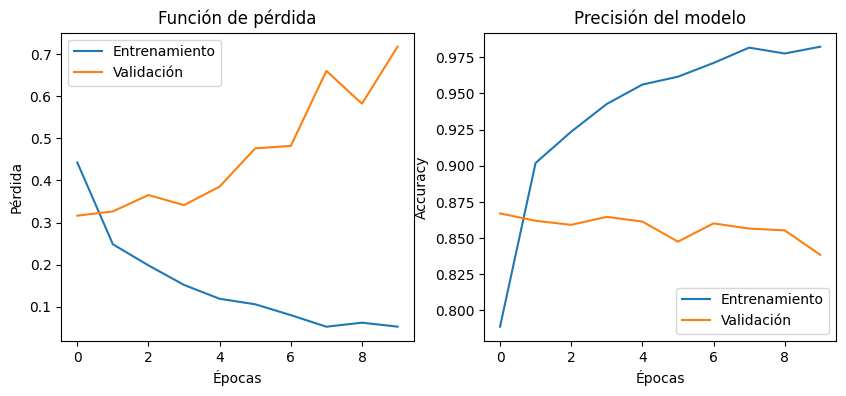

In [22]:
#Graficar resultados
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Función de pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del modelo')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
